In [ ]:
pip install matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D
import json
from keras.callbacks import History


#Traning Image Processes

In [ ]:
traning_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/test/train',
    labels = 'inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
                                )

tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/test/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 3121 files belonging to 36 classes.
Found 3121 files belonging to 36 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 36), dtype=tf.float32, name=None))>

validation image processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/test/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 22 files belonging to 36 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

#Buliding Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
#output layers
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#compiling and traning phase

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_histroy=cnn.fit(x=traning_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 109s 1s/step - loss: 3.5787 - accuracy: 0.0282 - val_loss: 3.5289 - val_accuracy: 0.0000e+00
Epoch 2/30
98/98 [==============================] - 111s 1s/step - loss: 3.5787 - accuracy: 0.0295 - val_loss: 3.5271 - val_accuracy: 0.0000e+00
Epoch 3/30
98/98 [==============================] - 103s 976ms/step - loss: 3.5788 - accuracy: 0.0311 - val_loss: 3.5270 - val_accuracy: 0.0000e+00
Epoch 4/30
98/98 [==============================] - 102s 967ms/step - loss: 3.5788 - accuracy: 0.0311 - val_loss: 3.5258 - val_accuracy: 0.0000e+00
Epoch 5/30
98/98 [==============================] - 103s 971ms/step - loss: 3.5788 - accuracy: 0.0298 - val_loss: 3.5256 - val_accuracy: 0.0000e+00
Epoch 6/30
98/98 [==============================] - 102s 963ms/step - loss: 3.5787 - accuracy: 0.0295 - val_loss: 3.5272 - val_accuracy: 0.0000e+00
Epoch 7/30
98/98 [==============================] - 110s 1s/step - loss: 3.5788 - accuracy: 0.0298 - val_loss: 3.5278 

#saving

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_histroy = training_histroy.history

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_histroy,f)

In [ ]:
print(training_histroy.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#calculating Accuracy of model

In [ ]:
print(training_histroy)


{'loss': [3.578742265701294, 3.5787479877471924, 3.578765392303467, 3.5787947177886963, 3.5787527561187744, 3.5787429809570312, 3.578821897506714, 3.5787696838378906, 3.5787501335144043, 3.5787672996520996, 3.5787770748138428, 3.578733205795288, 3.5787620544433594, 3.5787670612335205, 3.5787227153778076, 3.578742265701294, 3.5787148475646973, 3.5787601470947266, 3.5787570476531982, 3.578738212585449, 3.578697919845581, 3.5787363052368164, 3.578761100769043, 3.5787458419799805, 3.578761339187622, 3.5787417888641357, 3.5787971019744873, 3.578745126724243, 3.5787363052368164, 3.578779697418213], 'accuracy': [0.028196090832352638, 0.029477732256054878, 0.03107978217303753, 0.03107978217303753, 0.02979814074933529, 0.029477732256054878, 0.02979814074933529, 0.02979814074933529, 0.028836911544203758, 0.03204101324081421, 0.03204101324081421, 0.03107978217303753, 0.03011855110526085, 0.028836911544203758, 0.028196090832352638, 0.0317206010222435, 0.03075937181711197, 0.029157321900129318, 0.0

In [ ]:
val_accuracy = training_histroy['loss']


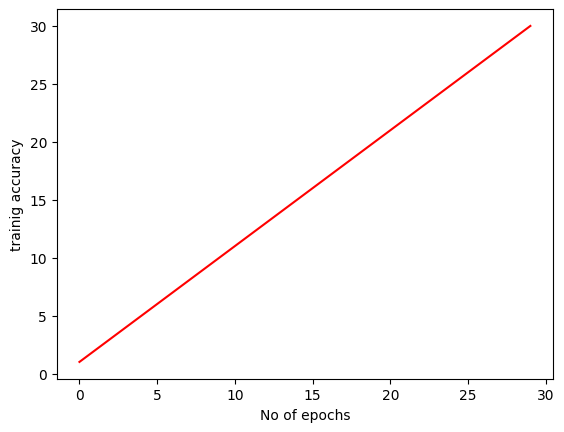

In [ ]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,color='red')
plt.xlabel('No of epochs')
plt.ylabel('trainig accuracy')

plt.show()

Text(0, 0.5, 'Validation Accuracy')

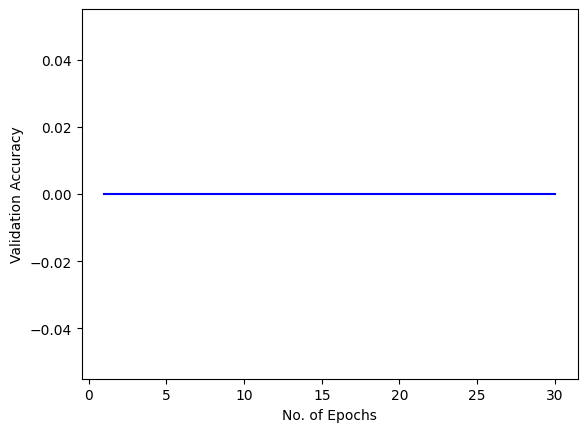

In [ ]:
plt.plot(epochs, training_histroy['val_accuracy'], color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')